In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/pattern-sense/patterns.zip -d /content/raw_data

Archive:  /content/drive/MyDrive/pattern-sense/patterns.zip
  inflating: /content/raw_data/data_pattern/animal/3280.jpg  
  inflating: /content/raw_data/data_pattern/animal/3281.jpg  
  inflating: /content/raw_data/data_pattern/animal/3282.jpg  
  inflating: /content/raw_data/data_pattern/animal/3283.jpg  
  inflating: /content/raw_data/data_pattern/animal/3284.jpg  
  inflating: /content/raw_data/data_pattern/animal/3285.jpg  
  inflating: /content/raw_data/data_pattern/animal/3286.jpg  
  inflating: /content/raw_data/data_pattern/animal/3287.jpg  
  inflating: /content/raw_data/data_pattern/animal/3288.jpg  
  inflating: /content/raw_data/data_pattern/animal/3289.jpg  
  inflating: /content/raw_data/data_pattern/animal/3290.jpg  
  inflating: /content/raw_data/data_pattern/animal/3291.jpg  
  inflating: /content/raw_data/data_pattern/animal/3292.jpg  
  inflating: /content/raw_data/data_pattern/animal/3293.jpg  
  inflating: /content/raw_data/data_pattern/animal/3294.jpg  
  inflatin

In [ ]:
import os

directory = '/content/raw_data'
labels = os.listdir(directory)
print("Found categories:", labels)


Found categories: ['data_pattern']


In [ ]:
labels.sort()
print("Sorted labels:", labels)


Sorted labels: ['data_pattern']


In [ ]:
import numpy as np
import pandas as pd
from numpy import random
import os
import matplotlib.pyplot as plt

In [ ]:
def read_data(folder, labels):
    label_list, path_list = [], []
    for l in labels:
        path = os.path.join(folder, l)
        for image_file in os.listdir(path):
            if image_file.endswith(('.jpg', '.jpeg', '.png')):  # ensures it's an image
                label_list.append(l)
                path_list.append(os.path.join(path, image_file))
    return label_list, path_list


In [ ]:
directory = '/content/raw_data/data_pattern'
labels = os.listdir(directory)
all_labels, all_paths = read_data(directory, labels)

df = pd.DataFrame({'path': all_paths, 'label': all_labels})


In [ ]:
df = pd.DataFrame({
    'path': all_paths,
    'label': all_labels
})
df.head()

,path,label
0,/content/raw_data/data_pattern/squares/2768.jpg,squares
1,/content/raw_data/data_pattern/squares/2675.jpg,squares
2,/content/raw_data/data_pattern/squares/2626.jpg,squares
3,/content/raw_data/data_pattern/squares/2673.jpg,squares
4,/content/raw_data/data_pattern/squares/2552.jpg,squares


In [ ]:
from sklearn.model_selection import train_test_split

train_df, dummy_df = train_test_split(df, train_size=0.8, stratify=df['label'], random_state=123)
valid_df, test_df = train_test_split(dummy_df, train_size=0.5, stratify=dummy_df['label'], random_state=123)

print("Train:", len(train_df), "Test:", len(test_df), "Validation:", len(valid_df))
print("Train distribution:\n", train_df['label'].value_counts())


Train: 3384 Test: 423 Validation: 423
Train distribution:
 label
stripes      400
polka dot    398
plain        398
tribal       397
floral       396
squares      351
ikat         284
animal       281
geometry     271
cartoon      208
Name: count, dtype: int64


In [ ]:
directory = '/content/raw_data'

In [ ]:
labels = os.listdir(directory)
print("Found categories:", labels)

Found categories: ['data_pattern']


In [ ]:
labels.sort()
print("Sorted labels:", labels)

Sorted labels: ['data_pattern']


In [ ]:
import plotly.express as px

In [ ]:
px.histogram(train_df, x='label', barmode='group')

In [ ]:
import cv2

In [ ]:
def apply_transform(image):
    # Rotate (random angle between -40 and 40 degrees)
    angle = np.random.uniform(-40, 40)
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    image = cv2.warpAffine(image, M, (cols, rows))

    # Horizontal Flip
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)

    # Vertical Flip
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 0)

    # Random Brightness and Contrast
    alpha = 1.0 + np.random.uniform(-0.2, 0.2)  # Brightness
    beta = 0.0 + np.random.uniform(-0.2, 0.2)   # Contrast
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Random Gamma Correction
    gamma = np.random.uniform(0.8, 1.2)
    image = np.clip((image / 255.0) ** gamma, 0, 1) * 255.0

    return image


In [ ]:
def apply_augmentation(image_path, label):
  image=cv2.imread(image_path)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  augmented_image=apply_transform(image=image)
  return augmented_image, label

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
gen=ImageDataGenerator()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = gen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=(255, 255),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

Found 3384 validated image filenames belonging to 10 classes.


In [ ]:
valid_gen = gen.flow_from_dataframe(
    valid_df,
    x_col='path',
    y_col='label',
    target_size=(255, 255),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=32
)

Found 423 validated image filenames belonging to 10 classes.


In [ ]:
test_gen = gen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label',
    target_size=(255, 255),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=32
)

Found 423 validated image filenames belonging to 10 classes.


In [ ]:
train_df['path'].head()


,path
697,/content/raw_data/data_pattern/tribal/2397.jpg
4221,/content/raw_data/data_pattern/ikat/2975.jpg
1339,/content/raw_data/data_pattern/floral/952.jpg
839,/content/raw_data/data_pattern/tribal/2177.jpg
4110,/content/raw_data/data_pattern/ikat/3166.jpg


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras import regularizers
from keras.models import Model
from keras.optimizers import Adam, Adamax
import tensorflow as tf


In [ ]:
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(255, 255, 3)))  # ✅ Define input shape separately
model.add(Convolution2D(filters=32, kernel_size=3, padding='same', activation="relu"))
model.add(MaxPooling2D(strides=2, pool_size=2, padding="valid"))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation="relu"))
model.add(MaxPooling2D(strides=2, pool_size=2, padding="valid"))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation="relu"))
model.add(MaxPooling2D(strides=2, pool_size=2, padding="valid"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Update number of classes if needed


In [ ]:
num_classes = len(train_gen.class_indices)
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,946,936 (15.06 MB)

 Trainable params: 3,946,936 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath="model_cnn.h5", monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [ ]:
model.compile(
    loss='categorical_crossentropy',  # ✅ fixed spelling
    optimizer='adam',
    metrics=['accuracy']
)


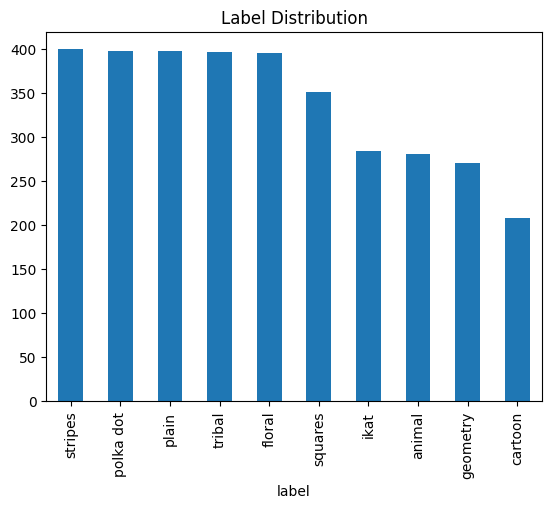

In [ ]:
train_df['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.show()


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get the unique class labels
classes = np.unique(train_df['label'])

# Compute balanced class weights
class_weights_array = compute_class_weight(class_weight='balanced',
                                           classes=classes,
                                           y=train_df['label'])

# Map class labels to indices (used by the generator)
label_to_index = train_gen.class_indices

# Re-map computed weights from class names to indices
class_weights = {label_to_index[label]: weight for label, weight in zip(classes, class_weights_array)}


In [ ]:
history_cnn = model.fit(
    x=train_gen,
    epochs=20,  # increase from 2 or 3
    verbose=1,
    validation_data=valid_gen,
    shuffle=True,
    class_weight=class_weights,  # 👈 Include this
    callbacks=[model_checkpoint_callback]
)

In [ ]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(255, 255, 3)
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[173:]:
    layer.trainable = True

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform')(x)
prediction = tf.keras.layers.Dense(10, activation='softmax')(x)  # Change 9 if needed


In [ ]:
final_model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction)

final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_resnet = final_model.fit(
    train_gen,
    epochs=20,
    validation_data=valid_gen,
    class_weight=class_weights,  # 👈 Include this
    callbacks=[model_checkpoint_callback]
)


Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1117 - loss: 2.6840
Epoch 1: val_accuracy did not improve from 0.30969
106/106 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.1118 - loss: 2.6816 - val_accuracy: 0.1584 - val_loss: 2.2703
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.1667 - loss: 2.2617
Epoch 2: val_accuracy did not improve from 0.30969
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.1668 - loss: 2.2616 - val_accuracy: 0.1537 - val_loss: 2.1660
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.1718 - loss: 2.2263
Epoch 3: val_accuracy did not improve from 0.30969
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.1719 - loss: 2.2260 - val_accuracy: 0.2388 - val_loss: 2.1160
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.2048 - loss: 2.1711
Epoch 4: val_accuracy did not improve from 0.30969
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.2048 - loss: 2.1711 - val_

106/106 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.2684 - loss: 2.0292 - val_accuracy: 0.3121 - val_loss: 1.9919
Epoch 20/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.2712 - loss: 2.0330
Epoch 20: val_accuracy did not improve from 0.31206
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.2711 - loss: 2.0332 - val_accuracy: 0.2719 - val_loss: 2.0175


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)


In [ ]:
labels = list(train_gen.class_indices.keys())


In [ ]:
for layer in base_model.layers[100:]:
    layer.trainable = True


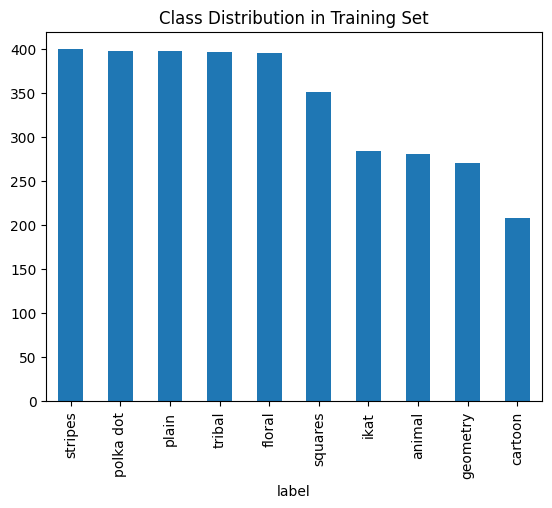

In [ ]:
import matplotlib.pyplot as plt

train_df['label'].value_counts().plot(kind='bar', title='Class Distribution in Training Set')
plt.show()


In [ ]:
import matplotlib.pyplot as plt


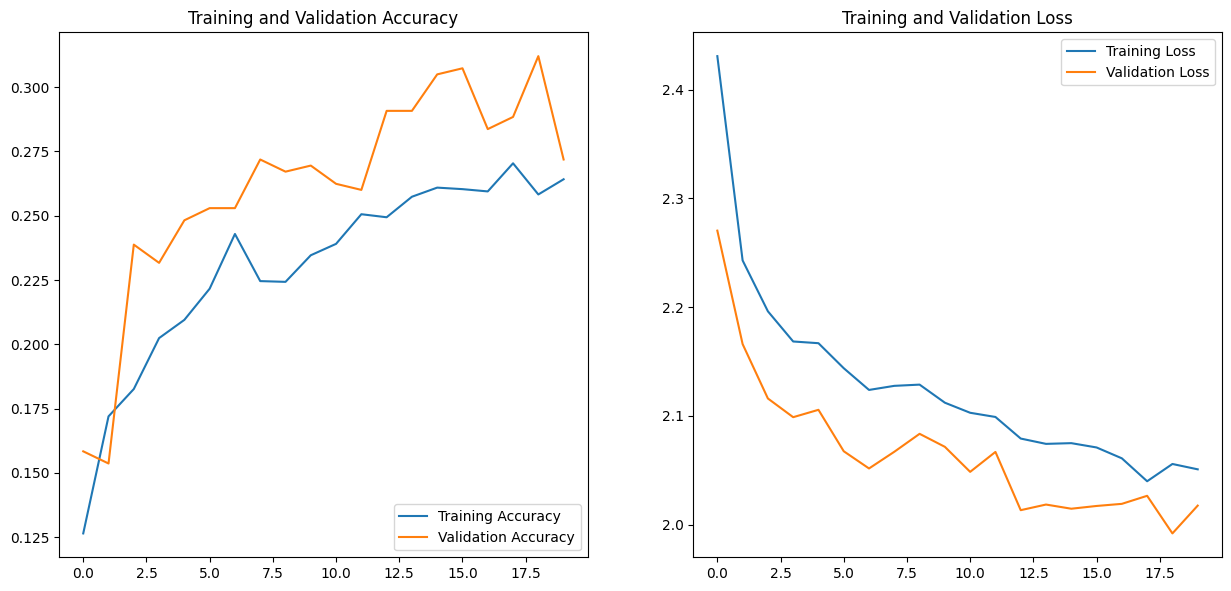

In [ ]:


# Assign the correct history object
history = history_resnet  # or history_cnn if you're using CNN

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # match number of epochs

plt.figure(figsize=(15, 15))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def predictor(model, test_gen):
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)

    preds = model.predict(test_gen, verbose=1)
    pred_indices = np.argmax(preds, axis=1)
    true_indices = test_gen.labels

    accuracy = np.sum(pred_indices == true_indices) * 100 / len(true_indices)
    print(f"Accuracy: {accuracy:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(true_indices, pred_indices)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(true_indices, pred_indices, target_names=classes))


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
def get_model_prediction(image_path):
    img = load_img(image_path, target_size=(255, 255))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    predictions = model.predict(x, verbose=0)
    return labels[predictions.argmax()]

In [ ]:
pred=[]
for file in test_df['path'].values:
  pred.append(get_model_prediction(file))

In [ ]:
labels = list(train_gen.class_indices.keys())


In [ ]:
# Step 1: Define labels
labels = list(train_gen.class_indices.keys())

# Step 2: Define the function
def get_model_prediction(image_path):
    img = load_img(image_path, target_size=(255, 255))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    predictions = final_model.predict(x, verbose=0)
    predicted_index = np.argmax(predictions)

    return labels[predicted_index]

# Step 3: Use it
pred = []
for file in test_df['path'].values:
    pred.append(get_model_prediction(file))



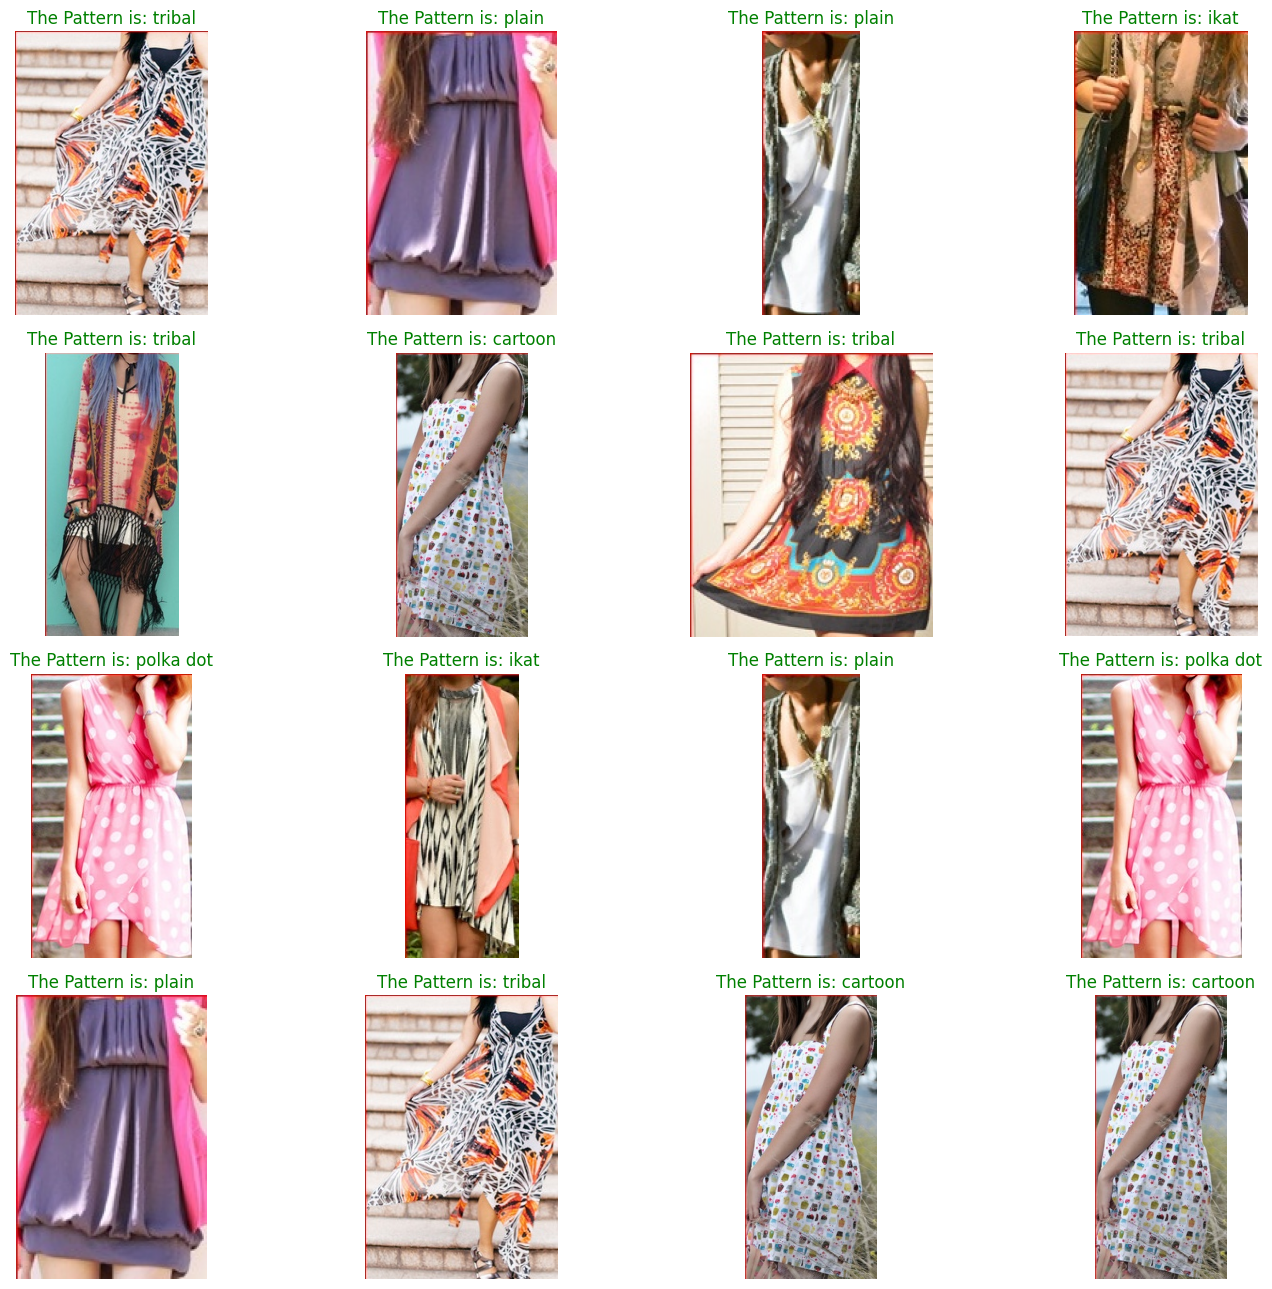

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 13))
random_index = np.random.randint(0, len(test_gen), 16)

for i, ax in enumerate(axes.ravel()):
    img_path = test_df['path'].iloc[random_index[i]]

    ax.imshow(load_img(img_path))
    ax.axis('off')

    if test_df['label'].iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "green"

    ax.set_title(
        f"The Pattern is: {test_df['label'].iloc[random_index[i]]}",
        color=color
    )

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.download('model_cnn.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>